# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%config IPCompleter.greedy=True
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
import scipy

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter
from sklearn.metrics import confusion_matrix



## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]
#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)
# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
86221,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:00,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
18308,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:00,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [5]:
project_data.sample

<bound method NDFrame.sample of         Unnamed: 0       id                        teacher_id teacher_prefix  \
86221         8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
18308        37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
79692        74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
98588       100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
57724        33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   
41908       146723  p099708  c0a28c79fe8ad5810da49de47b3fb491           Mrs.   
65282        95963  p155767  e50367a62524e11fbd2dc79651b6df21           Mrs.   
76584       139722  p182545  22460c54072bd0cf958cc8349fac8b8f            Ms.   
36938        72317  p087808  598621c141cda5fb184ee7e8ccdd3fcc            Ms.   
20668       114684  p049177  679f50f18ce50aabcc602d17f7627206           Mrs.   
41786        57854  p099430  4000cfe0c8b2df75a218347c1765e283            Ms.   
50434   

In [6]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [7]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

## 1.2 preprocessing of `project_subject_categories`

In [8]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

In [9]:
sorted_cat_dict

{'Warmth': 1388,
 'Care_Hunger': 1388,
 'History_Civics': 5914,
 'Music_Arts': 10293,
 'AppliedLearning': 12135,
 'SpecialNeeds': 13642,
 'Health_Sports': 14223,
 'Math_Science': 41421,
 'Literacy_Language': 52239}

## 1.3 preprocessing of `project_subject_subcategories`

In [10]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [11]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [12]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
86221,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:00,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
18308,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:00,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...


In [13]:
# printing some random reviews
print(project_data['essay'].values[0])

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [14]:

from tqdm import tqdm
preprocessed_essays = []
len_essay=[]
# tqdm is for printing the status bar
for sentance1 in tqdm(project_data['essay'].values):
    sent= sentance1.lower()
    sent = decontracted(sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())
    len_essay.append(len(sent.split()))
num_essay=np.array(len_essay)    
    

100%|████████████████████████████████| 109248/109248 [01:34<00:00, 1155.29it/s]


In [15]:
# after preprocesing
project_data['essay']=preprocessed_essays
project_data['num_essay']=num_essay
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)
print(project_data['essay'].values[0])

fortunate enough use fairy tale stem kits classroom well stem journals students really enjoyed would love implement lakeshore stem kits classroom next school year provide excellent engaging stem lessons students come variety backgrounds including language socioeconomic status many not lot experience science engineering kits give materials provide exciting opportunities students month try several science stem steam projects would use kits robot help guide science instruction engaging meaningful ways adapt kits current language arts pacing guide already teach material kits like tall tales paul bunyan johnny appleseed following units taught next school year implement kits magnets motion sink vs float robots often get units not know teaching right way using right materials kits give additional ideas strategies lessons prepare students science challenging develop high quality science activities kits give materials need provide students science activities go along curriculum classroom althou

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [16]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
len_project=[]
# tqdm is for printing the status bar
for sentence2 in tqdm(project_data['project_title'].values):
    sent = sentence2.lower()
    sent = decontracted(sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
    len_project.append(len(sent.split()))
num_project=np.array(len_project)

100%|███████████████████████████████| 109248/109248 [00:04<00:00, 27202.39it/s]


In [17]:
# after preprocesing
project_data['project_title']=preprocessed_titles
project_data['num_project']=num_project
print(project_data['project_title'][0])

not 21st century learners across ocean


In [18]:
#Preprocessing the project_grade_category
project_grade_category_cleaned=[]
for grade in tqdm(project_data['project_grade_category'].values):
    grade = grade.replace(' ', '_')
    grade = grade.replace('-', '_')
    project_grade_category_cleaned.append(grade)
project_data['Project_grade_category']=project_grade_category_cleaned

100%|██████████████████████████████| 109248/109248 [00:00<00:00, 747868.98it/s]


In [19]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

# Assignment 11: TruncatedSVD

- <font color='red'>step 1</font> Select the top 2k words from essay text and project_title (concatinate essay text with project title and then find the top 2k words) based on their <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>`idf_`</a> values 
- <font color='red'>step 2</font> Compute the co-occurance matrix with these 2k words, with window size=5 (<a href='https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/'>ref</a>)
    <img src='cooc.JPG' width=300px>
- <font color='red'>step 3</font> Use <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on calculated co-occurance matrix and reduce its dimensions, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a>
 >- The shape of the matrix after TruncatedSVD will be 2000\*n, i.e. each row represents a vector form of the corresponding word. <br>
 >- Vectorize the essay text and project titles using these word vectors. (while vectorizing, do ignore all the words which are not in top 2k words)
- <font color='red'>step 4</font> Concatenate these truncatedSVD matrix, with the matrix with features
<ul>
    <li><strong>school_state</strong> : categorical data</li>
    <li><strong>clean_categories</strong> : categorical data</li>
    <li><strong>clean_subcategories</strong> : categorical data</li>
    <li><strong>project_grade_category</strong> :categorical data</li>
    <li><strong>teacher_prefix</strong> : categorical data</li>
    <li><strong>quantity</strong> : numerical data</li>
    <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
    <li><strong>price</strong> : numerical data</li>
    <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
    <li><strong>number of words in the title</strong> : numerical data</li>
    <li><strong>number of words in the combine essays</strong> : numerical data</li>
    <li><strong>word vectors calculated in</strong> <font color='red'>step 3</font> : numerical data</li>
</ul>
- <font color='red'>step 5</font>: Apply GBDT on matrix that was formed in <font color='red'>step 4</font> of this assignment, <font color='blue'><strong>DO REFER THIS BLOG: <a href='https://www.kdnuggets.com/2017/03/simple-xgboost-tutorial-iris-dataset.html'>XGBOOST DMATRIX<strong></a></font>
<li><font color='red'>step 6</font>:Hyper parameter tuning (Consider any two hyper parameters)<ul><li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>



<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

In [20]:
project_data=project_data.sample(n=50000)

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [21]:
from sklearn.model_selection import train_test_split
# split the data set into train and test respectively 80% and 20%
y=project_data['project_is_approved']
project_data.drop(['project_is_approved'],axis=1, inplace=True)
x=project_data
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=1)
print("Shape of Train data set X={} Y={}".format(X_train.shape,Y_train.shape))
print("Shape of Test data set X={} Y={}".format(X_test.shape,Y_test.shape))

Shape of Train data set X=(40000, 18) Y=(40000,)
Shape of Test data set X=(10000, 18) Y=(10000,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

### 1.5.1 Vectorizing Categorical data

In [25]:
# we use count vectorizer to convert the values into one hot encoded features
# Project categories
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_categories = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()),lowercase=False, binary=True)

tr_categories_one_hot=vectorizer_categories.fit_transform(X_train['clean_categories'].values)
print(vectorizer_categories.get_feature_names())

te_categories_one_hot =vectorizer_categories.transform(X_test['clean_categories'].values)

print(tr_categories_one_hot.toarray()[0:1])
print("\nShape of matrix after one hot encodig for 'Project categories'\nTrain data-{},\nTest data-{}".format(tr_categories_one_hot.shape,te_categories_one_hot.shape))

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
[[0 0 0 1 0 0 0 0 0]]

Shape of matrix after one hot encodig for 'Project categories'
Train data-(40000, 9),
Test data-(10000, 9)


In [26]:
# we use count vectorizer to convert the values into one hot encoded features
# Project subcategories
vectorizer_subcategories = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)

tr_sub_categories_one_hot=vectorizer_subcategories.fit_transform(X_train['clean_subcategories'].values)
print(vectorizer_subcategories.get_feature_names())

te_sub_categories_one_hot = vectorizer_subcategories.transform(X_test['clean_subcategories'].values)

print(tr_sub_categories_one_hot.toarray()[0:2])
print("\nShape of matrix after one hot encodig for 'Project sub categories'\nTrain data-{},\nTest data-{}".format(tr_sub_categories_one_hot.shape,te_sub_categories_one_hot.shape))

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]]

Shape of matrix after one hot encodig for 'Project sub categories'
Train data-(40000, 30),
Test data-(10000, 30)


In [27]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
# we use count vectorizer to convert the values into one hot encoded features
#teacher_prefix
vectorizer_teacher_prefix = CountVectorizer(lowercase=False, binary=True)
tr_teacher_prefix_one_hot=vectorizer_teacher_prefix.fit_transform(X_train['teacher_prefix'].values.astype('str'))
print(vectorizer_teacher_prefix.get_feature_names())


te_teacher_prefix_one_hot = vectorizer_teacher_prefix.transform(X_test['teacher_prefix'].values.astype('str'))

print(tr_teacher_prefix_one_hot.toarray()[0:1])
print("\nShape of matrix after one hot encodig for 'teacher_prefix'\nTrain data-{},\nTest data-{}".format(tr_teacher_prefix_one_hot.shape,te_teacher_prefix_one_hot.shape))

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
[[0 0 1 0 0]]

Shape of matrix after one hot encodig for 'teacher_prefix'
Train data-(40000, 5),
Test data-(10000, 5)


In [28]:
# we use count vectorizer to convert the values into one hot encoded features
#school_state
vectorizer_school_state = CountVectorizer(lowercase=False, binary=True)
tr_school_state_one_hot=vectorizer_school_state.fit_transform(X_train['school_state'].values.astype('str'))
print(vectorizer_school_state.get_feature_names())


te_school_state_one_hot = vectorizer_school_state.transform(X_test['school_state'].values.astype('str'))

print(tr_school_state_one_hot.toarray()[0:1])
print("\nShape of matrix after one hot encodig for 'teacher_prefix'\nTrain data-{},\nTest data-{}".format(tr_school_state_one_hot.shape,te_school_state_one_hot.shape))

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
[[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

Shape of matrix after one hot encodig for 'teacher_prefix'
Train data-(40000, 51),
Test data-(10000, 51)


In [29]:
# we use count vectorizer to convert the values into one hot encoded features
#project_grade_category
vectorizer_grade_category = CountVectorizer(lowercase=False, binary=True)
tr_grade_category_one_hot=vectorizer_grade_category.fit_transform(X_train['Project_grade_category'])
print(vectorizer_grade_category.get_feature_names())


te_grade_category_one_hot = vectorizer_grade_category.transform(X_test['Project_grade_category'])

print(tr_grade_category_one_hot.toarray()[0:1])

print(te_grade_category_one_hot.toarray()[0:1])
print("\nShape of matrix after one hot encodig for 'project_grade_category'\nTrain data-{},\nTest data-{}".format(tr_grade_category_one_hot.shape,te_grade_category_one_hot.shape))

['Grades_3_5', 'Grades_6_8', 'Grades_9_12', 'Grades_PreK_2']
[[1 0 0 0]]
[[0 0 0 1]]

Shape of matrix after one hot encodig for 'project_grade_category'
Train data-(40000, 4),
Test data-(10000, 4)


### 1.5.2 standardizing Numerical features

In [30]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(X_train['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
tr_price_standardized=price_scalar.fit_transform(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.

te_price_standardized = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

Mean : 297.57086675, Standard deviation : 366.98452145935426


In [31]:
print("\nShape of matrix after column standardization for 'price'\nTrain data-{},\nTest data-{}".format(tr_price_standardized.shape,te_price_standardized.shape))


Shape of matrix after column standardization for 'price'
Train data-(40000, 1),
Test data-(10000, 1)


In [32]:
#quantity
quantity_scalar = StandardScaler()
tr_quantity_standardized=quantity_scalar.fit_transform(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.

te_quantity_standardized = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))
print("\nShape of matrix after column standardization for 'quantity'\nTrain data-{},\nTest data-{}".format(tr_quantity_standardized.shape,te_quantity_standardized.shape))

Mean : 16.9118, Standard deviation : 26.186896928807737

Shape of matrix after column standardization for 'quantity'
Train data-(40000, 1),
Test data-(10000, 1)


In [33]:
#teacher_number_of_previously_posted_projects
teacher_number_of_previously_posted_projects_scalar = StandardScaler()
tr_teacher_number_of_previously_posted_projects_standardized=teacher_number_of_previously_posted_projects_scalar.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.

te_teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print("\nShape of matrix after column standardization for 'teacher_number_of_previously_posted_projects'\nTrain data-{},\nTest data-{}".format(tr_teacher_number_of_previously_posted_projects_standardized.shape,te_teacher_number_of_previously_posted_projects_standardized.shape))

Mean : 11.1628, Standard deviation : 27.96335809876918

Shape of matrix after column standardization for 'teacher_number_of_previously_posted_projects'
Train data-(40000, 1),
Test data-(10000, 1)


In [34]:
#Number of words in essay 
num_essay_scalar = StandardScaler()
tr_num_essay_standardized=num_essay_scalar.fit_transform(X_train['num_essay'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {num_essay_scalar.mean_[0]}, Standard deviation : {np.sqrt(num_essay_scalar.var_[0])}")

# Now standardize the data with above maen and variance.

te_num_essay_standardized = num_essay_scalar.transform(X_test['num_essay'].values.reshape(-1, 1))
print("\nShape of matrix after column standardization for 'num_essay'\nTrain data-{},\nTest data-{}".format(tr_num_essay_standardized.shape,te_num_essay_standardized.shape))

Mean : 138.30975, Standard deviation : 36.41687802293738

Shape of matrix after column standardization for 'num_essay'
Train data-(40000, 1),
Test data-(10000, 1)


In [35]:
#Number of words in project title 
num_project_scalar = StandardScaler()
tr_num_project_standardized=num_project_scalar.fit_transform(X_train['num_project'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {num_project_scalar.mean_[0]}, Standard deviation : {np.sqrt(num_project_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
te_num_project_standardized = num_project_scalar.transform(X_test['num_project'].values.reshape(-1, 1))
print("\nShape of matrix after column standardization for 'num_project'\nTrain data-{},\nTest data-{}".format(tr_num_project_standardized.shape,te_num_project_standardized.shape))

Mean : 3.692075, Standard deviation : 1.5271893118978406

Shape of matrix after column standardization for 'num_project'
Train data-(40000, 1),
Test data-(10000, 1)


In [36]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def senti(data,col_name):
    neg=[]
    neu=[]
    pos=[]
    compound=[]
    sid = SentimentIntensityAnalyzer()
    for senti in data[col_name]:
        ss = sid.polarity_scores(senti)
        neg.append(ss['neg'])
        neu.append(ss['neu'])
        pos.append(ss['pos'])
        compound.append(ss['compound']) 
    return(neg,pos,compound)    
# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975

C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [37]:

neg_train=[]
pos_train=[]
compound_train=[]
neg_train,pos_train,compound_train=senti(X_train,'essay')
X_train['neg']=neg_train
X_train['pos']=pos_train
X_train['compound']=compound_train

In [38]:
neg_test=[]
pos_test=[]
compound_test=[]
neg_test,pos_test,compound_test=senti(X_test,'essay')
X_test['neg']=neg_test
X_test['pos']=pos_test
X_test['compound']=compound_test

In [40]:
#sentiment score neg
neg_scalar = StandardScaler()
tr_neg_standardized=neg_scalar.fit_transform(X_train['neg'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {neg_scalar.mean_[0]}, Standard deviation : {np.sqrt(neg_scalar.var_[0])}")

# Now standardize the data with above maen and variance.

te_neg_standardized = neg_scalar.transform(X_test['neg'].values.reshape(-1, 1))
print("\nShape of matrix after column standardization for 'neg'\nTrain data-{},\nTest data-{}".format(tr_neg_standardized.shape,te_neg_standardized.shape))

Mean : 0.04799937500000001, Standard deviation : 0.035721878094654755

Shape of matrix after column standardization for 'neg'
Train data-(40000, 1),
Test data-(10000, 1)


In [41]:
#sentiment score pos
pos_scalar = StandardScaler()
tr_pos_standardized=pos_scalar.fit_transform(X_train['pos'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {pos_scalar.mean_[0]}, Standard deviation : {np.sqrt(pos_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
te_pos_standardized = pos_scalar.transform(X_test['pos'].values.reshape(-1, 1))
print("\nShape of matrix after column standardization for 'pos'\nTrain data-{},\nTest data-{}".format(tr_pos_standardized.shape,te_pos_standardized.shape))

Mean : 0.28089825, Standard deviation : 0.07790639926820839

Shape of matrix after column standardization for 'pos'
Train data-(40000, 1),
Test data-(10000, 1)


In [42]:
#sentiment score compound
compound_scalar = StandardScaler()
tr_compound_standardized=compound_scalar.fit_transform(X_train['compound'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {compound_scalar.mean_[0]}, Standard deviation : {np.sqrt(compound_scalar.var_[0])}")

# Now standardize the data with above maen and variance.

te_compound_standardized = compound_scalar.transform(X_test['compound'].values.reshape(-1, 1))
print("\nShape of matrix after column standardization for 'compound'\nTrain data-{},\nTest data-{}".format(tr_compound_standardized.shape,te_compound_standardized.shape))

Mean : 0.9582628149999999, Standard deviation : 0.15277141821615645

Shape of matrix after column standardization for 'compound'
Train data-(40000, 1),
Test data-(10000, 1)


<h2>2.1 Selecting top 2000 words from `essay` and `project_title`</h2>

In [43]:
#merging essays and project title
X_train['text']=X_train['essay']+X_train['project_title']
X_test['text']=X_test['essay']+X_test['project_title']

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_text = TfidfVectorizer(min_df=10,use_idf=True)
#Fitting train data and transforming  train ,cv and test to get idf values
tr_text_tfidf=tfidf_vectorizer_text.fit_transform(X_train['text'])
te_text_tfidf = tfidf_vectorizer_text.transform(X_test['text'])
print("Shape of matrix TFIDF Vectorizer on text \nTrain data-{},\nTest data-{}".format(tr_text_tfidf.shape,te_text_tfidf.shape))

Shape of matrix TFIDF Vectorizer on text 
Train data-(40000, 11898),
Test data-(10000, 11898)


In [49]:
#storing idf_values and feature_name
idf_feature=pd.DataFrame(tfidf_vectorizer_text.idf_,columns=['idf_values'])
idf_feature['feature_name']=tfidf_vectorizer_text.get_feature_names()
#sorting feature_name based on idf_values
idf_feature.sort_values(by=['idf_values'],ascending=False,inplace=True,axis=0)

In [50]:
#idf values and feature name
idf_feature[1995:2000]

,idf_values,feature_name
11644,8.824071,weird
49,8.824071,2006
6955,8.824071,nannanlegos
11628,8.824071,wednesday
10837,8.824071,tiger


<h2>2.2 Computing Co-occurance matrix</h2>

In [51]:
#https://stackoverflow.com/questions/35562789/how-do-i-calculate-a-word-word-co-occurrence-matrix-with-sklearn
from collections import defaultdict
import pandas as pd
import numpy as np

def co_occurrence(sentences,vocab,window_size):
    d = defaultdict(int)
    vocab = vocab
    for text in sentences:
        # toknizing the sentance 
        text = text.lower().split()
        # iterate over all token
        for i in range(len(text)):
            token = text[i]
            #checking whether token is present in vocabulary
            if token not in vocab:
                continue
            #getting words which are there with in 5 window 
            next_token = text[i+1 : i+1+window_size]
            #considering next_token which are present in vocabulary
            next_token=[tok for tok in next_token if tok in vocab]
            
            for t in next_token:
                key = tuple( sorted([t, token]) )
                #increasing count value for occurrence of particular word 
                d[key] += 1
                

    # formulate the dictionary into dataframe
    #vocab = sorted(vocab) # sort vocab
    df = pd.DataFrame(data=np.zeros((len(vocab), len(vocab)), dtype=np.int16),
                      index=vocab,
                      columns=vocab)
    for key, value in d.items():
        df.at[key[0], key[1]] = value
        df.at[key[1], key[0]] = value
        df.at[key[0],key[0]]=0
    return df

In [52]:
text = ["ABC DEF IJK PQR","PQR KLM OPQ","LMN PQR XYZ ABC DEF PQR ABC"]
df = co_occurrence(text,['abc','pqr','def'],2)
print("Co-occurrence matrix with window_size=2")
df

Co-occurrence matrix with window_size=2


,abc,pqr,def
abc,0,3,3
pqr,3,0,2
def,3,2,0


In [53]:
text = ["ABC DEF IJK PQR","PQR KLM OPQ","LMN PQR XYZ ABC DEF PQR ABC"]
df = co_occurrence(text,['abc','pqr','def'],5)
print("Co-occurrence matrix with window_size=5")
df

Co-occurrence matrix with window_size=5


,abc,pqr,def
abc,0,5,3
pqr,5,0,3
def,3,3,0


In [54]:
#computing Co-occurrence matrix
text=X_train.essay
df = co_occurrence(text,idf_feature.feature_name[:2000].tolist(),5)
print("Co-occurrence matrix with window_size=5")

Co-occurrence matrix with window_size=5


In [55]:
df[:5]

,wholesome,dynamath,duolingo,nannanmiss,dwindle,nannanmentor,fleece,dye,lifecycle,lifeskills,...,portables,horrific,handball,lip,affirmation,weird,2006,nannanlegos,wednesday,tiger
wholesome,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dynamath,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
duolingo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nannanmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dwindle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2>2.3 Applying TruncatedSVD and Calculating Vectors for `essay` and `project_title`</h2>


In [56]:
from sklearn.decomposition import TruncatedSVD
def dimension_reduction(components):
    explained_variance=[]
    for component in tqdm(components):
        svd = TruncatedSVD(n_components=component, n_iter=7, random_state=42)
        svd.fit(df)
        explained_variance.append(svd.explained_variance_ratio_.sum())
    plt.plot(components,explained_variance,label="Explained variance")
    plt.scatter(components,explained_variance)
    plt.title("Percentage of variance explained for different N components")
    plt.xlabel("N components")
    plt.ylabel("Explained variance")
    plt.legend()
    plt.show()



100%|████████████████████████████████████████████| 9/9 [00:23<00:00,  2.66s/it]


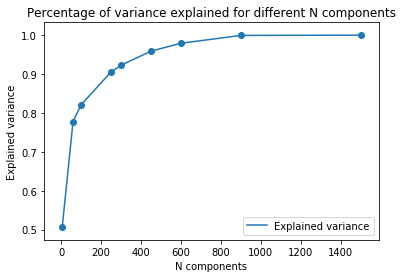

Wall time: 24.3 s


In [57]:
%%time
components=[6,60,100,250,300,450,600,900,1500]
dimension_reduction(components)

1. From the above graph we can see that 95% of variance is explained if n_components=450

In [58]:
svd = TruncatedSVD(n_components=450, n_iter=7)
#getting top 450 dim matrix using truncatedsvd
svd_feature=svd.fit_transform(df)

In [59]:
from scipy.sparse import hstack,vstack
#storing SVD feature vectors along with feature name
svd_feature_with_word = pd.DataFrame((svd_feature),index=df.index)
svd_feature_with_word.insert(0,"feature_name",idf_feature.feature_name[:2000].tolist())
print("SVD feature vectors")
svd_feature_with_word[:2]

SVD feature vectors


,feature_name,0,1,2,3,4,5,6,7,8,...,440,441,442,443,444,445,446,447,448,449
wholesome,wholesome,-1.875912e-15,-3.503816e-15,1.354070e-14,-1.306480e-14,-3.311039e-17,2.215150e-17,-1.307838e-17,-2.155450e-16,-2.305935e-16,...,-1.113940e-15,1.700031e-15,-7.209336e-16,3.193930e-16,-6.920124e-17,3.524278e-15,2.868836e-15,-1.892456e-15,-1.731544e-16,4.646722e-16
dynamath,dynamath,1.435113e-04,8.321642e-05,7.055589e-01,-7.096124e-01,-1.420106e-03,1.510340e-05,-4.654300e-15,-1.785879e-02,-2.001095e-02,...,3.246023e-04,-2.140332e-04,-9.558653e-04,-1.564781e-03,4.307180e-04,1.120349e-03,1.080230e-03,2.995034e-04,2.544778e-05,1.227331e-03


In [60]:
keys=idf_feature.feature_name[:2000]
values=svd_feature
#dictionary  having key as feature name and values as vector
dict_feat={k:v for (k,v) in zip(keys,values)}

In [61]:
#function to calculate word vector
def get_final_svd_vector(sentences):
    vector_words=[]
    for text in tqdm(sentences):
        vector_word=np.zeros((450),dtype=float)
        word_count=0
        text = text.lower().split()
        #print(text)
        for i in range(len(text)):
            token = text[i]
            #print(token.)
            if token in dict_feat.keys():
                vector_word=vector_word+dict_feat[token]
                word_count=word_count+1
            else:
                continue
        if word_count!=0:
            vector_word=vector_word/word_count
        vector_words.append(vector_word)
    return(vector_words)    

In [62]:
#computing word_vector for train ,test and cv data
tr_word_vector=get_final_svd_vector(X_train['text'])
te_word_vector=get_final_svd_vector(X_test['text'])

100%|█████████████████████████████████| 10000/10000 [00:00<00:00, 13425.86it/s]


In [63]:
tr_word_vector =scipy.sparse.csr_matrix(tr_word_vector)

<h2>2.4 Merge the features from <font color='red'>step 3</font> and <font color='red'>step 4</font></h2>

In [64]:
%%time
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
#categorical, numerical features and word_vector
from scipy.sparse import hstack
tr_word_vector =scipy.sparse.csr_matrix(tr_word_vector)
te_word_vector =scipy.sparse.csr_matrix(te_word_vector)

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
tr_X_SVD= hstack((tr_school_state_one_hot,tr_categories_one_hot,tr_sub_categories_one_hot,tr_teacher_prefix_one_hot,tr_grade_category_one_hot,tr_price_standardized,tr_teacher_number_of_previously_posted_projects_standardized,tr_num_essay_standardized,tr_num_project_standardized,tr_neg_standardized,tr_pos_standardized,tr_compound_standardized,tr_word_vector
)).tocsr()
te_X_SVD= hstack((te_school_state_one_hot,te_categories_one_hot,te_sub_categories_one_hot,te_teacher_prefix_one_hot,te_grade_category_one_hot,te_price_standardized,te_teacher_number_of_previously_posted_projects_standardized,te_num_essay_standardized,te_num_project_standardized,te_neg_standardized,te_pos_standardized,te_compound_standardized,te_word_vector
)).tocsr()
tr_X_SVD=tr_X_SVD.toarray()
te_X_SVD=te_X_SVD.toarray()
print(tr_X_SVD.shape)
print(te_X_SVD.shape)

(40000, 556)
(10000, 556)
Wall time: 784 ms


<h2>2.5 Apply XGBoost on the Final Features from the above section</h2>
https://xgboost.readthedocs.io/en/latest/python/python_intro.html

In [65]:
#Function to draw 3-d plot
import plotly.graph_objs as go
import plotly.offline as offline
def plot_3d(x1,y1,z1,x2,y2,z2):
    x1=[5, 10, 50, 100, 200,5, 10, 50, 100, 200,5, 10, 50, 100, 200,5, 10, 50, 100, 200,5, 10, 50, 100, 200,5, 10, 50, 100, 200]#estimators
    y1=[2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6,7,7,7,7,7]#max-depth
    trace1 = go.Scatter3d(x=x1,y=y1,z=z1,mode='markers', name = 'train')
    trace2 = go.Scatter3d(x=x1,y=y1,z=z2,mode='markers', name = 'Cross validation')
    data = [trace1, trace2]
    #print(data)
    layout = go.Layout(scene = dict(xaxis = dict(title='n_estimators'),yaxis = dict(title='max_depth'),zaxis = dict(title='AUC'),))
    fig = go.Figure(data=data, layout=layout)
    offline.iplot(fig, filename='3d-scatter-colorscale')

In [92]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#Drawing confusion matrix
def draw_confusion_matrix(clf,threshold,y_true,y_hat,tpr,fpr,t):
    result=[]
    y_pred=[]

    #finding threshold which maximises the tpr and minimises the fpr
    thr=threshold[np.argmax((tpr*(1-fpr)))]
    
    for probab in y_hat:
    
        if probab >= thr:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    result=confusion_matrix(y_true,y_pred,labels=[0,1])
    df_cm = pd.DataFrame(result,range(2),range(2))
    df_cm.columns = ['Predicted NO','Predicted YES']
    df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})
    plt.figure(figsize = (5,3))
    plt.title(t)
    print(df_cm)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, fmt='g')


In [76]:
#3 flod cross validation
#Hyper parameter considered are learning_rate,max_depth and n_estimators
%%time
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
params={"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.02] ,
 "max_depth"        : [ 4, 10, 12, 15,30],
 'n_estimators':[5, 10, 50, 100, 200] }
model = XGBClassifier(objective= 'binary:logistic',seed=27,n_jobs=-1)
gs=GridSearchCV(estimator=model,cv=3,n_jobs=-1,scoring ='roc_auc',verbose=True,param_grid=params,return_train_score=True)
gs.fit(tr_word_vector,Y_train)


Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 146.9min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed: 319.8min finished


Wall time: 5h 24min 30s


In [81]:
results=pd.DataFrame(gs.cv_results_).sort_values(by='rank_test_score').head(56)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
104,184.586528,1.324414,0.916352,0.008808,0.02,4,200,"{'learning_rate': 0.02, 'max_depth': 4, 'n_est...",0.506616,0.514635,0.516404,0.512551,0.004259,1,0.614832,0.609313,0.614519,0.612888,0.002531
52,48.366705,0.276515,0.821803,0.003301,0.15,4,50,"{'learning_rate': 0.15, 'max_depth': 4, 'n_est...",0.510712,0.511013,0.515536,0.512420,0.002206,2,0.631094,0.625923,0.627159,0.628059,0.002205
28,94.690404,1.035085,0.960158,0.156301,0.1,4,100,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.514423,0.511143,0.511454,0.512340,0.001478,3,0.641017,0.637072,0.636523,0.638204,0.002002
27,48.525312,0.335993,0.815288,0.009689,0.1,4,50,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.513451,0.511827,0.510915,0.512064,0.001049,4,0.611799,0.613775,0.617293,0.614289,0.002272
3,93.966380,0.439344,0.825813,0.001885,0.05,4,100,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",0.507972,0.511101,0.515300,0.511458,0.003002,5,0.618671,0.615118,0.624226,0.619339,0.003748
16,33.967560,0.258124,0.814105,0.005718,0.05,15,10,"{'learning_rate': 0.05, 'max_depth': 15, 'n_es...",0.505800,0.517470,0.509453,0.510908,0.004874,6,0.618016,0.621936,0.614911,0.618288,0.002874
40,18.296691,0.139092,0.819454,0.004714,0.1,15,5,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.507910,0.513812,0.508964,0.510229,0.002570,7,0.601207,0.603775,0.599118,0.601367,0.001905
107,111.482266,2.373438,0.858070,0.004083,0.02,10,50,"{'learning_rate': 0.02, 'max_depth': 10, 'n_es...",0.502565,0.516753,0.511012,0.510110,0.005827,8,0.630314,0.631858,0.633028,0.631733,0.001112
103,93.417718,0.513658,0.866145,0.008643,0.02,4,100,"{'learning_rate': 0.02, 'max_depth': 4, 'n_est...",0.503373,0.514760,0.511712,0.509948,0.004813,9,0.587574,0.590369,0.592849,0.590264,0.002155
120,33.293198,0.249856,0.865812,0.034977,0.02,30,5,"{'learning_rate': 0.02, 'max_depth': 30, 'n_es...",0.504282,0.510998,0.514555,0.509945,0.004260,10,0.618432,0.620516,0.634392,0.624447,0.007083


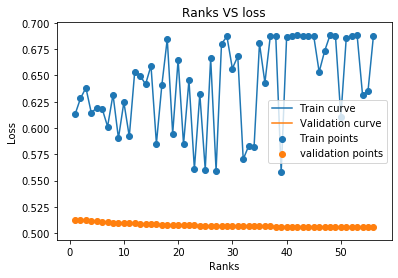

In [82]:
x=[x for x in range(1,57)]
y_train_loss=results.mean_train_score.tolist()
y_test_loss=results.mean_test_score.tolist()
#function to plot lines
#plt.xscale('log')
plt.plot(x,y_train_loss,label="Train curve")
plt.plot(x,y_test_loss,label="Validation curve")
plt.scatter(x, y_train_loss, label='Train points')
plt.scatter(x, y_test_loss, label='validation points')
plt.xlabel("Ranks")
plt.ylabel("Loss")
plt.title("Ranks VS loss")
plt.legend()
plt.show()

In [88]:
results.params[104]

{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 200}

1. {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 200}  This paramaters providing best result compare to other paramters

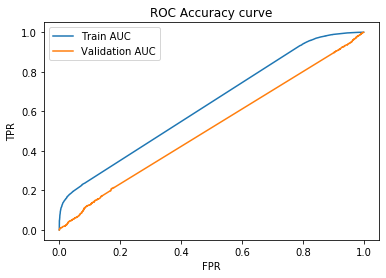

Train AUC = 0.63
Test AUC = 0.51
            Predicted NO  Predicted YES
Actual NO           5469            514
Actual YES         25891           8126
            Predicted NO  Predicted YES
Actual NO           1424             95
Actual YES          7892            589
Wall time: 4min 56s


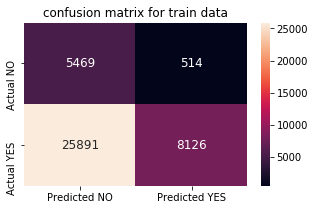

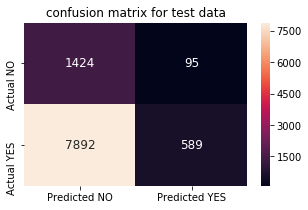

In [93]:
%%time
class_w={0:0.5,1:0.5}
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve, auc
#training model with best lambda(λ) paramter
trained_xgb_tfidf_w2v=xgb.XGBClassifier(n_estimators=200,max_depth=4,class_weight=class_w)
#trainning model
trained_xgb_tfidf_w2v.fit(tr_word_vector,Y_train)
# predict the response on the train data
predicted_labels_train=trained_xgb_tfidf_w2v.predict_proba(tr_word_vector)
predicted_labels_train_temp=trained_xgb_tfidf_w2v.predict(tr_word_vector)
# predict the response on the test data
predicted_labels_test=trained_xgb_tfidf_w2v.predict_proba(te_word_vector)
#Calculating FPR and TPR for train and test data
tr_fpr,tr_tpr,tr_threshold=roc_curve(Y_train,predicted_labels_train[:,1])
te_fpr,te_tpr,te_threshold=roc_curve(Y_test,predicted_labels_test[:,1])
#drawing ROC ROC Accuracy curve for test and train data 
plt.plot(tr_fpr,tr_tpr,label="Train AUC")
plt.plot(te_fpr,te_tpr,label="Validation AUC")
plt.title("ROC Accuracy curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()
print("Train AUC =",round(auc(tr_fpr,tr_tpr),2))
print("Test AUC =",round(auc(te_fpr,te_tpr),2))
#drawing confusion matrix for test and train data 
t2="confusion matrix for train data"
draw_confusion_matrix(trained_xgb_tfidf_w2v,tr_threshold,Y_train,predicted_labels_train[:,1],tr_tpr,tr_fpr,t2)
t1="confusion matrix for test data"
draw_confusion_matrix(trained_xgb_tfidf_w2v,tr_threshold,Y_test,predicted_labels_test[:,1],te_tpr,te_fpr,t1)

In [94]:
from prettytable import PrettyTable
print("XGboost")    
table = PrettyTable()

table.field_names = ["XGboost",  "Max Depth","n_estimators", 'learning_rate',"AUC"]

table.add_row(["Train",  "4","200","0.02",0.63])
table.add_row(["Test",  "4","200","0.02",0.51])
print(table)

XGboost
+---------+-----------+--------------+---------------+------+
| XGboost | Max Depth | n_estimators | learning_rate | AUC  |
+---------+-----------+--------------+---------------+------+
|  Train  |     4     |     200      |      0.02     | 0.63 |
|   Test  |     4     |     200      |      0.02     | 0.51 |
+---------+-----------+--------------+---------------+------+
